In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the IRIS Dataset
data = load_iris()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='target')

# Show the first few rows of the dataset
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (105, 4)
Testing set size: (45, 4)


In [11]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Show a preview of the scaled data
print("First 5 rows of the scaled training data:")
print(pd.DataFrame(X_train, columns=data['feature_names']).head())

First 5 rows of the scaled training data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.217016           0.951192          0.758890
3           0.912961         -0.022844           0.309096          0.217746
4           1.636440          1.416315           1.301427          1.705891


In [15]:
# Model Building
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Display training completion
print("Logistic Regression model trained successfully.")

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Display training completion
print("KNN model trained successfully.")

# Logistic Regression Prediction
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Predictions:")
print(y_pred_log[:10])  # Show first 10 predictions

# KNN Prediction
y_pred_knn = knn.predict(X_test)
print("KNN Predictions:")
print(y_pred_knn[:10])  # Show first 10 predictions

Logistic Regression model trained successfully.
KNN model trained successfully.
Logistic Regression Predictions:
[1 0 2 1 1 0 1 2 1 1]
KNN Predictions:
[1 0 2 1 1 0 1 2 1 1]


Logistic Regression Accuracy: 1.0
Confusion Matrix (Logistic Regression):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


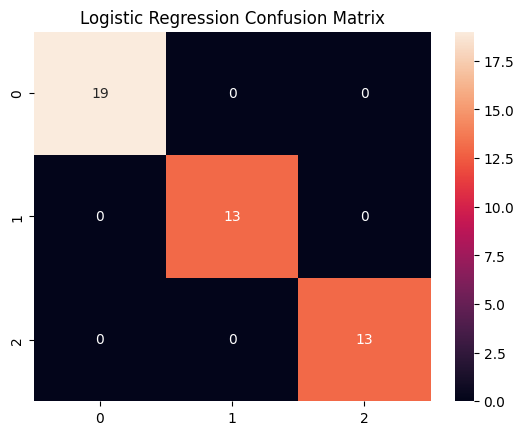

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

KNN Accuracy: 1.0
Confusion Matrix (KNN):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


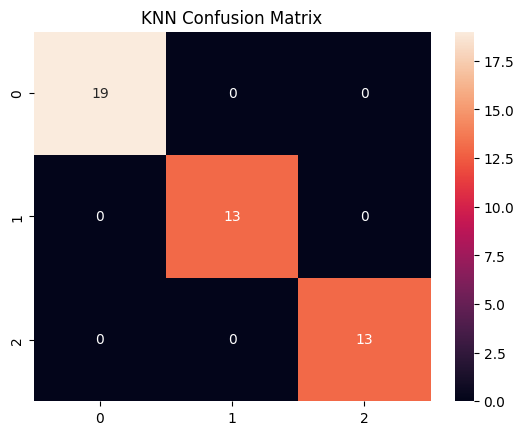

Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [16]:
# Performance Analysis -  Logistic Regression

# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log}")

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix (Logistic Regression):")
print(cm_log)

# Visualize Confusion Matrix
sns.heatmap(cm_log, annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

# Performance Analysis -  KNN

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(cm_knn)

# Visualize Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('KNN Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

In [ ]:
# Comparing and Training Multiple Classifiers

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Predictions:")
print(y_pred_dt[:10])

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() # Pass parameters
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Predictions:")
print(y_pred_rf[:10])

Decision Tree Predictions:
[1 0 2 1 1 0 1 2 1 1]
Random Forest Predictions:
[1 0 2 1 1 0 1 2 1 1]


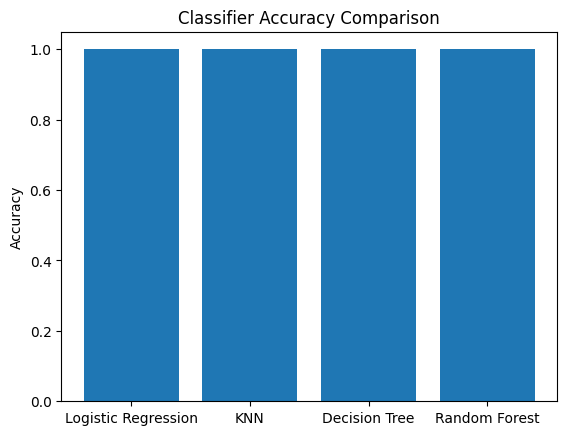

In [ ]:
# Collect accuracy scores
classifiers = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_log,
    accuracy_knn,
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

# Plot the comparison
plt.bar(classifiers, accuracies)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()

# Parameter Tuning
# Grid Search